### **Part 1**

### **Problem Statement**

A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices. They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

The company has provided publicly available data from the King County Assessor's office to use for clustering and prediction.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
!install warnings
import warnings
warnings.filterwarnings('ignore')

install: missing destination file operand after 'warnings'
Try 'install --help' for more information.


In [ ]:
#load the dataset
df = pd.read_csv('/content/option_A_clustering_df - option_A_clustering_df.csv')
df

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,805000,1260,0,0,0,2010,1040,750,0,0,...,0,790,0,3,0,0,2,1954,-122.279912,47.713188
4940,855000,1660,0,0,0,3060,1400,1400,0,0,...,0,360,0,5,0,1,2,1948,-122.275338,47.693839
4941,655000,1310,0,0,0,1590,1290,280,290,170,...,0,100,0,4,0,2,1,1979,-122.218349,47.730287
4942,930000,1300,0,0,0,2600,1300,1300,0,0,...,0,0,100,3,0,0,2,1948,-122.382874,47.571078


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

### **Data Exploration**

In [ ]:
# Columns to drop
columns_to_drop = [
    'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor',
    'SqFtTotBasement', 'SqFtGarageBasement', 'SqFtGarageAttached',
    'DaylightBasement', 'SqFtOpenPorch',
    'SqFtEnclosedPorch'
]

df = df.drop(columns=columns_to_drop)
df


,SalePrice,SqFtTotLiving,SqFtFinBasement,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,3180,1590,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,2200,810,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,2525,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,1820,620,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,320,0,3,0,0,2,1967,-122.184194,47.730389
...,...,...,...,...,...,...,...,...,...,...,...,...
4939,805000,2010,750,790,0,3,0,0,2,1954,-122.279912,47.713188
4940,855000,3060,1400,360,0,5,0,1,2,1948,-122.275338,47.693839
4941,655000,1590,280,100,0,4,0,2,1,1979,-122.218349,47.730287
4942,930000,2600,1300,0,100,3,0,0,2,1948,-122.382874,47.571078


In [ ]:
df.isnull().sum()

SalePrice          0
SqFtTotLiving      0
SqFtFinBasement    0
SqFtDeck           0
BrickStone         0
Bedrooms           0
BathHalfCount      0
Bath3qtrCount      0
BathFullCount      0
YrBuilt            0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
#checking for and dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
#removing outliers
df = df[(df['SalePrice'] >= df['SalePrice'].quantile(0.05)) & (df['SalePrice'] <= df['SalePrice'].quantile(0.95))]
df

,SalePrice,SqFtTotLiving,SqFtFinBasement,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,3180,1590,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,2200,810,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,2525,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,1820,620,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,320,0,3,0,0,2,1967,-122.184194,47.730389
...,...,...,...,...,...,...,...,...,...,...,...,...
4939,805000,2010,750,790,0,3,0,0,2,1954,-122.279912,47.713188
4940,855000,3060,1400,360,0,5,0,1,2,1948,-122.275338,47.693839
4941,655000,1590,280,100,0,4,0,2,1,1979,-122.218349,47.730287
4942,930000,2600,1300,0,100,3,0,0,2,1948,-122.382874,47.571078


In [ ]:
#checking for unique values
for col in df.columns:
  print(f'{col} : {df[col].unique()}')
  print('\n')

SalePrice : [ 400000  474250  667950 ...  934939  442000 1214950]


SqFtTotLiving : [3180 2200 2525 1820 2310 1970 1750 1120 1540 1550 1730 1450 2110 2190
 2220 1090 1460 2500 1380 1410 1080 1290 1170 1710 2487 2630 2550 2410
 2470 2330 1950 2900 2840 1430 1840 1110 2820 1370 3330 1650 2290  900
  790 3290 1740 2740 2600 1330 2160 2373 1920 1220 3160 1910 1630 2730
 2992 1250 2240 1270  940 1520 2020 1400 1210  880  920 1480 1490 2080
 1190 1660 1050 3260 2300 1200 3240 1560 1230 1535 1360 1810 2180 1780
 2690 1930 1320 3840 1440 1130 1020 1610 3188 3490 1870 2210 2334 1260
 2950 2060  870 2440 1300 1040 1940 1500 1580 1670 3130 1880 2560 3780
 1530 3070 1160 2100 2320 1680 1900 2822 1700 1390 2040 2460 1988  950
  980 1800 2790 1310 3010 2090 3300 2250 2990 2510 2000 2680 2390  960
 3400 3030 1150 1350 4400 1850 1690 2710 1510 2070 1760  610 1720 1304
 3540 2380 3270 2810 1890 2946 1830 2120 2750 1420 1980  990 2450 5250
  670 2360 1280 2880 2800 1790 1100  840 1640 3020 2760 2280  78

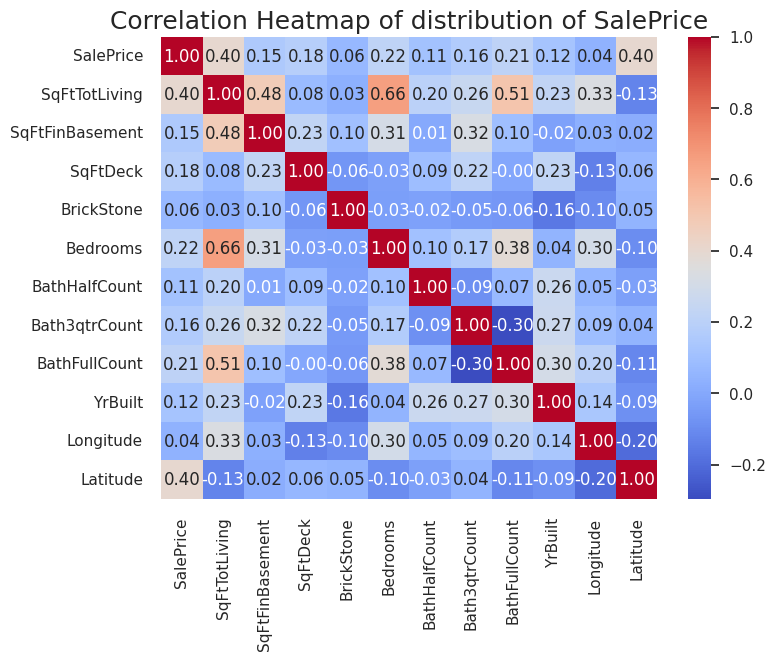

In [ ]:
#exploration visualisations using a correlation heatmap
# Plot the distribution of SalePrice
# Set the style
sns.set(style="whitegrid" )

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
heatmap.set_title('Correlation Heatmap of distribution of SalePrice', fontsize=18)
plt.show()

From the heatmap above,

There is a positive correlation between SalePrice increases as SqFtTotLiving increases.

A negative correlation between year Built and SquareFinFit Basement



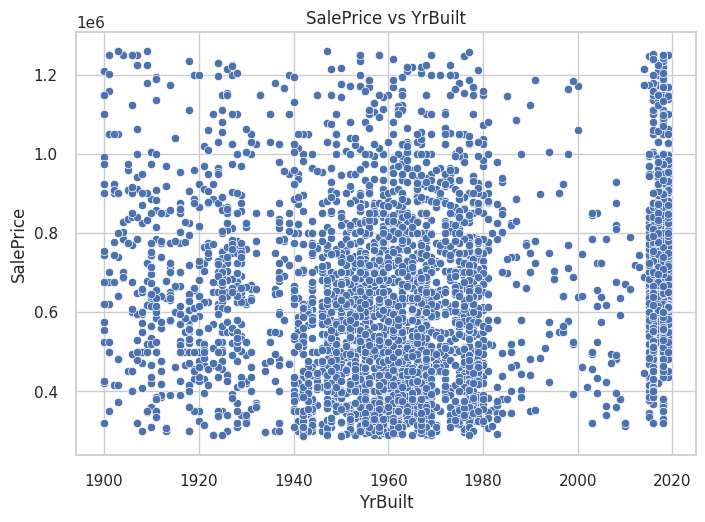

In [ ]:
# Scatter Plot of SalePrice vs YrBuilt
import seaborn as sns
sns.scatterplot(x='YrBuilt', y='SalePrice', data=df)
plt.title('SalePrice vs YrBuilt')
plt.xlabel('YrBuilt')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
# Removing outliers
df = df[(df['SalePrice'] >= df['SalePrice'].quantile(0.05)) & (df['SalePrice'] <= df['SalePrice'].quantile(0.95))]
df

,SalePrice,SqFtTotLiving,SqFtFinBasement,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,3180,1590,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,2200,810,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,2525,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,1820,620,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,320,0,3,0,0,2,1967,-122.184194,47.730389
...,...,...,...,...,...,...,...,...,...,...,...,...
4938,550000,1300,0,140,0,3,0,0,1,1936,-122.157790,47.488875
4939,805000,2010,750,790,0,3,0,0,2,1954,-122.279912,47.713188
4940,855000,3060,1400,360,0,5,0,1,2,1948,-122.275338,47.693839
4941,655000,1590,280,100,0,4,0,2,1,1979,-122.218349,47.730287


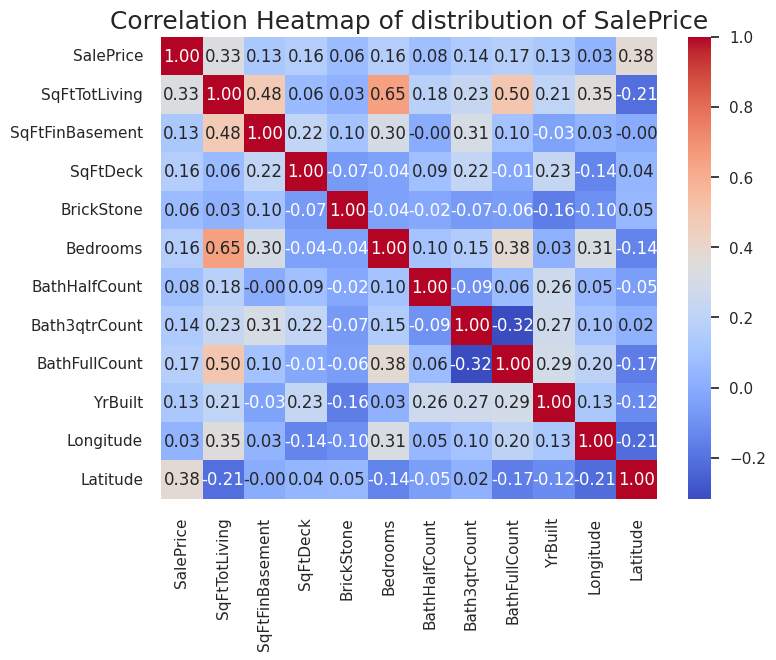

In [ ]:
# Plot the distribution of SalePrice after removing outliers
sns.set(style="whitegrid")
# Correlation Heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
heatmap.set_title('Correlation Heatmap of distribution of SalePrice', fontsize=18)
plt.show()

### **Data Preparation for Modelling**





In [ ]:
#scale the df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.31640205,  1.85747887,  3.03988477, ..., -0.25439009,
         0.88781703, -2.03189984],
       [-0.89636988,  0.43450852,  1.13941697, ..., -0.85763769,
        -0.98075646, -0.60526518],
       [ 0.19939081,  0.90641195, -0.83414575, ...,  1.37437843,
         1.33617328, -1.19903247],
       ...,
       [ 1.25753245,  1.68323761,  2.57695031, ..., -0.76715055,
        -0.00337154,  0.90519121],
       [ 0.12613267, -0.45121793, -0.15192654, ...,  0.16788323,
         0.64000944,  1.20445099],
       [ 1.68180737,  1.01531274,  2.33330059, ..., -0.76715055,
        -1.21739197, -0.10274446]])

In [ ]:
#using pipelines to avoid data leakage
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numeric_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['SalePrice', 'SqFtTotLiving', 'SqFtFinBasement', 'SqFtDeck',
       'BrickStone', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCount', 'YrBuilt', 'Longitude', 'Latitude'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index([], dtype='object'))])

In [ ]:
#train_test split
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


X_train.shape: (3188, 11)
X_test.shape: (798, 11)
y_train.shape: (3188,)
y_test.shape: (798,)


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,SqFtTotLiving,SqFtFinBasement,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,SalePrice
686,1600,0,140,0,3,0,1,1,1960,-122.310808,47.371201,349950
695,1560,0,0,0,4,0,0,1,1926,-122.327913,47.674974,807700
2146,1740,420,660,0,3,1,2,1,2016,-122.299027,47.598754,758800
752,3180,0,700,0,3,1,0,3,1963,-122.196844,47.508616,975000
553,1630,510,480,0,3,1,1,1,2018,-122.410478,47.576069,775000
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1680,600,240,0,3,0,0,1,1912,-122.260705,47.499214,390000
1588,1620,490,140,0,3,1,0,2,1980,-122.339538,47.754717,520000
1069,870,0,0,0,2,0,0,1,1908,-122.280264,47.499224,550000
4352,2320,990,0,0,3,0,2,1,1960,-122.292740,47.579219,830000


In [ ]:
y_train.dropna()

686     349950
695     807700
2146    758800
752     975000
553     775000
         ...  
1385    390000
1588    520000
1069    550000
4352    830000
3939    745000
Name: SalePrice, Length: 3188, dtype: int64

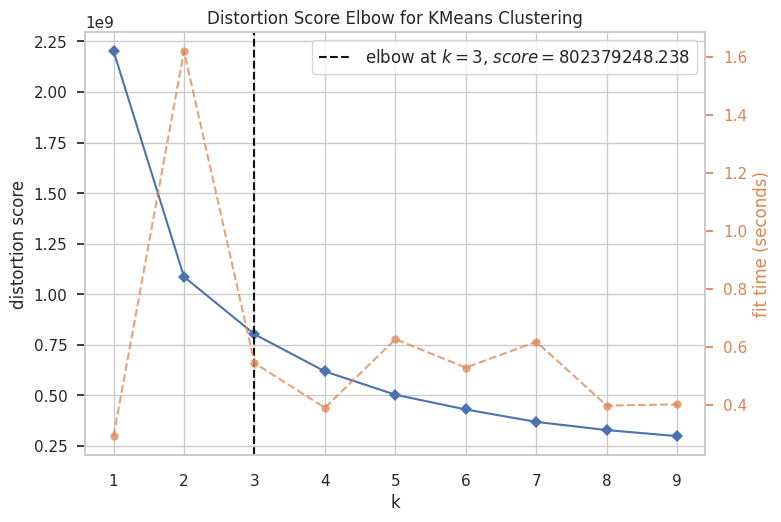

For n_clusters = 2, the silhouette score is 0.46631505407117646
For n_clusters = 3, the silhouette score is 0.370705613279976
For n_clusters = 4, the silhouette score is 0.4149335729448064
For n_clusters = 5, the silhouette score is 0.3293045345315055
For n_clusters = 6, the silhouette score is 0.353205658154254
For n_clusters = 7, the silhouette score is 0.3472237123535038
For n_clusters = 8, the silhouette score is 0.3549923694765444
For n_clusters = 9, the silhouette score is 0.3502322815432261
For n_clusters = 10, the silhouette score is 0.33068715636765783


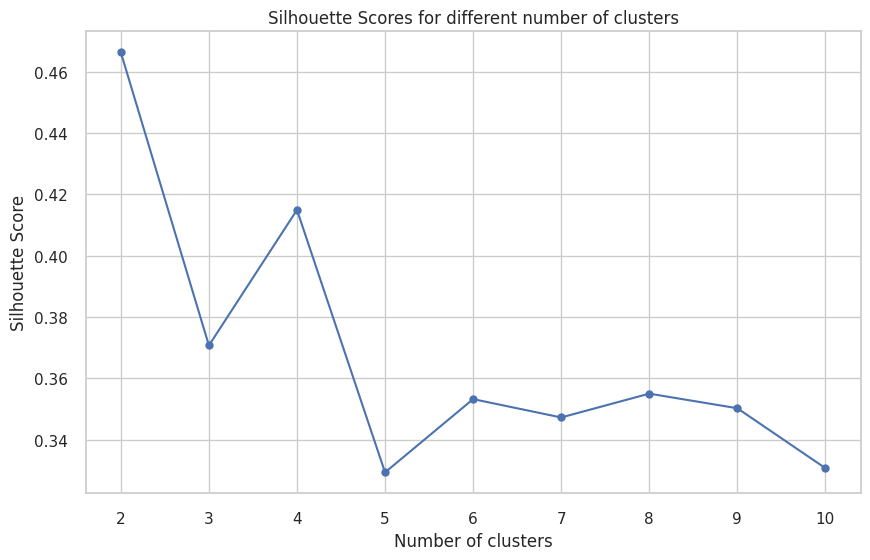

In [ ]:
#elbow and silloute method score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
# Elbow Method
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X_train)
visualizer.show()

# Silhouette Scores for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}')

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
#cluster the df
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

### **#Explain your choice of clusters**

Based on the silhouette scores, n_clusters = 3 is the optimal choice as it provides the highest score, indicating well-defined and distinct clusters.


## **#Create 2 report quality explanatory visualizations showing important differences between the clusters.**

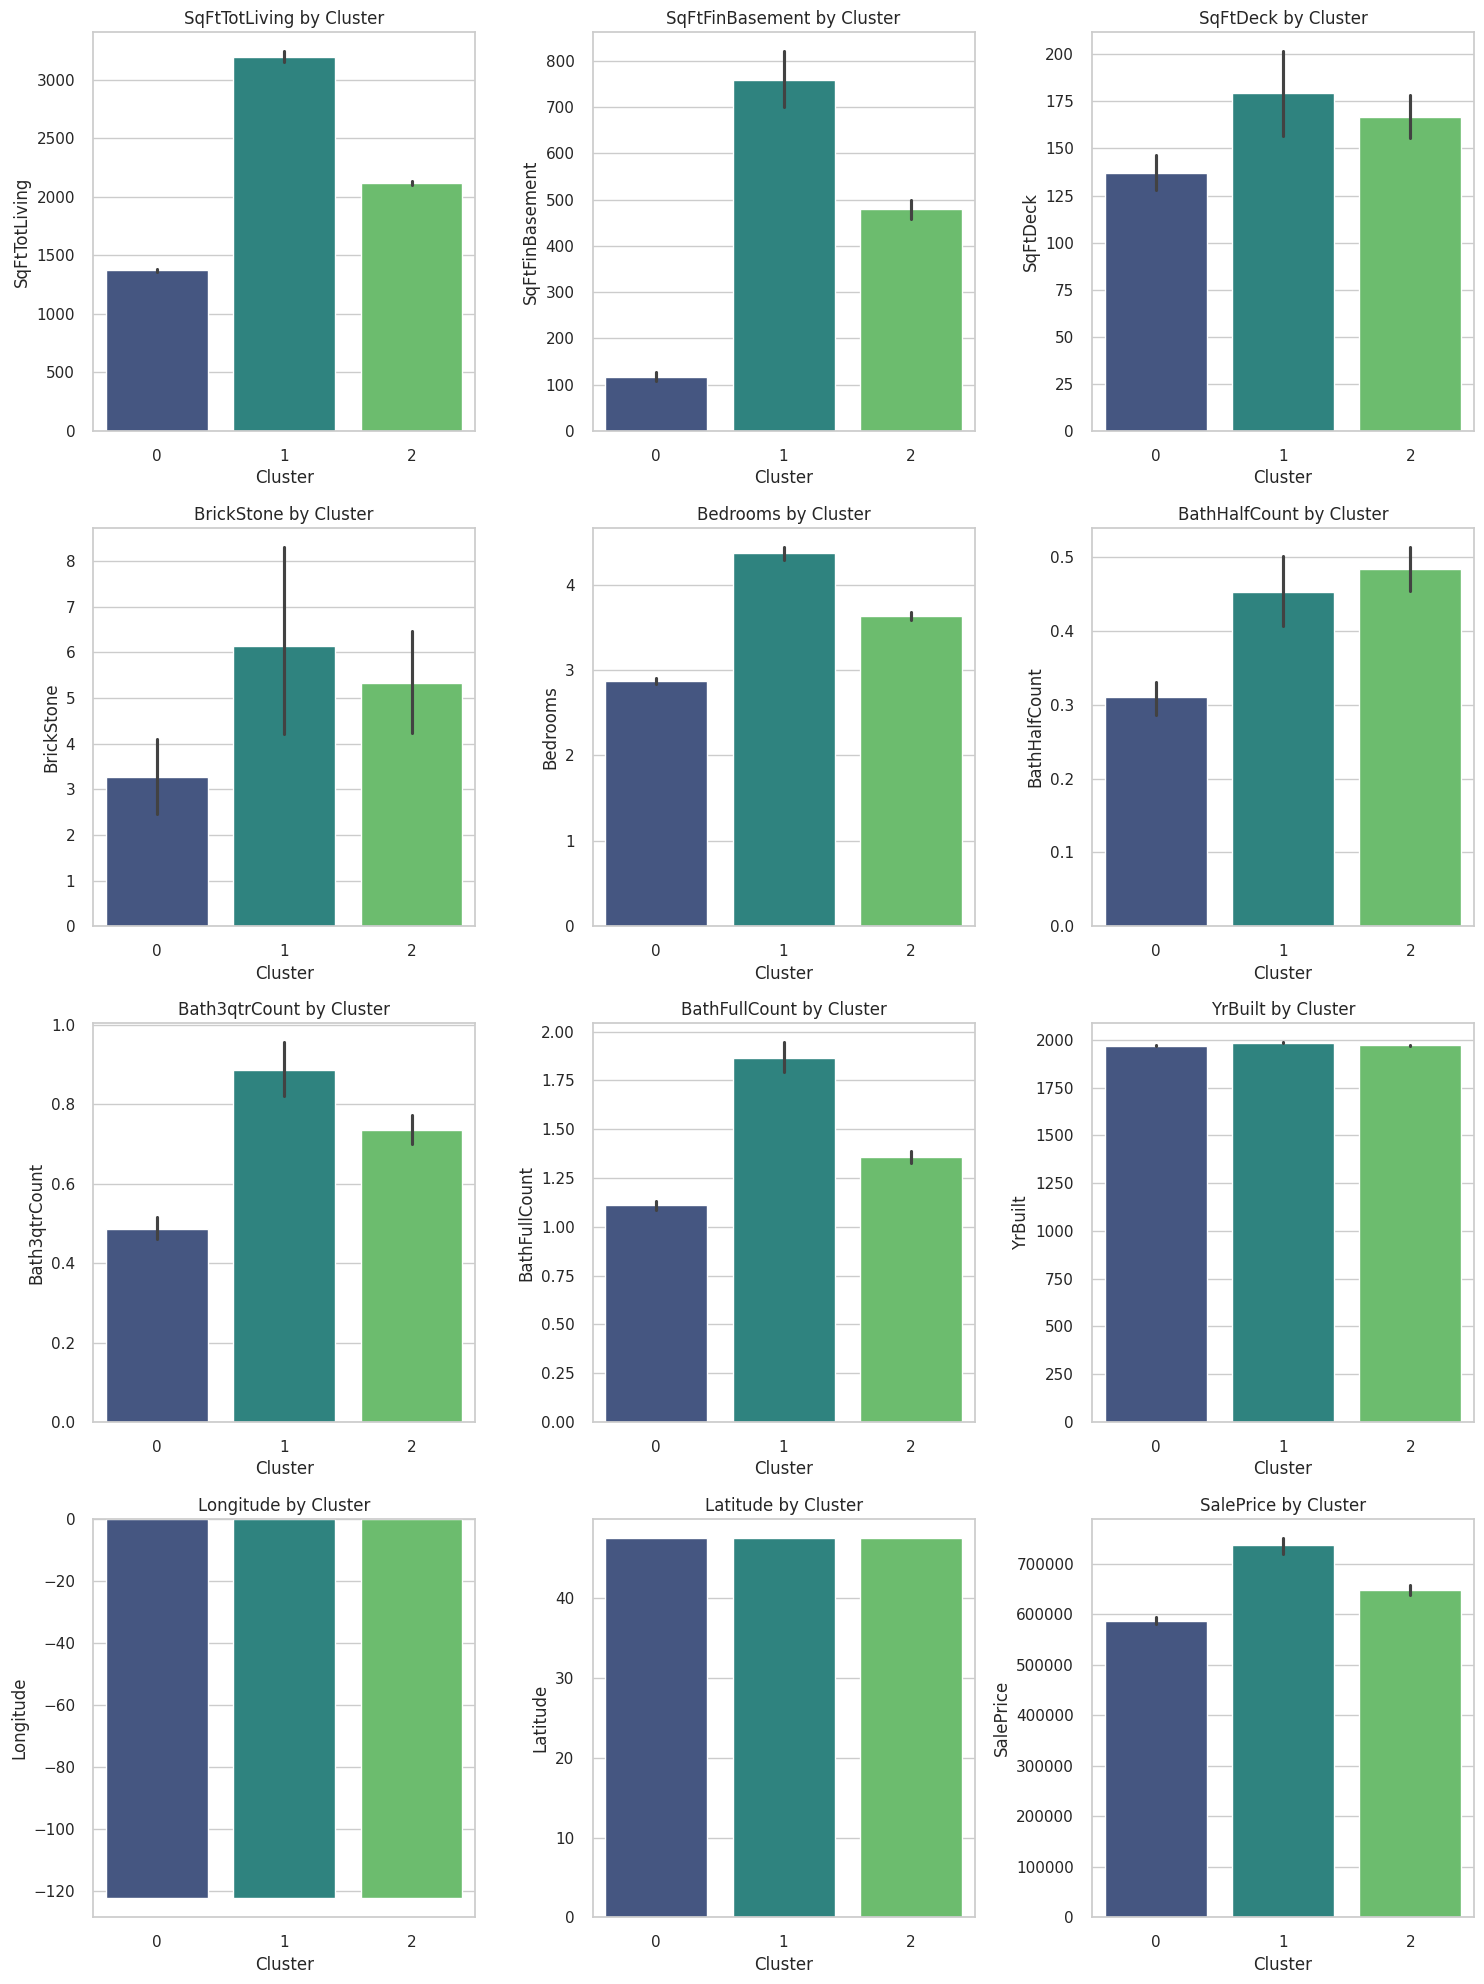

In [ ]:
# Cluster the training data
# Cluster the training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the original dataset
df_train['Cluster'] = kmeans.labels_

# Calculate the number of rows and columns for subplots
num_cols = len(df_train.columns[:-1])
num_rows = (num_cols + 2) // 3

# Plot bar plots for each feature
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df_train.columns[:-1]):
    plt.subplot(num_rows, 3, i+1)
    sns.barplot(x='Cluster', y=col, data=df_train, palette='viridis')
    plt.title(f'{col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

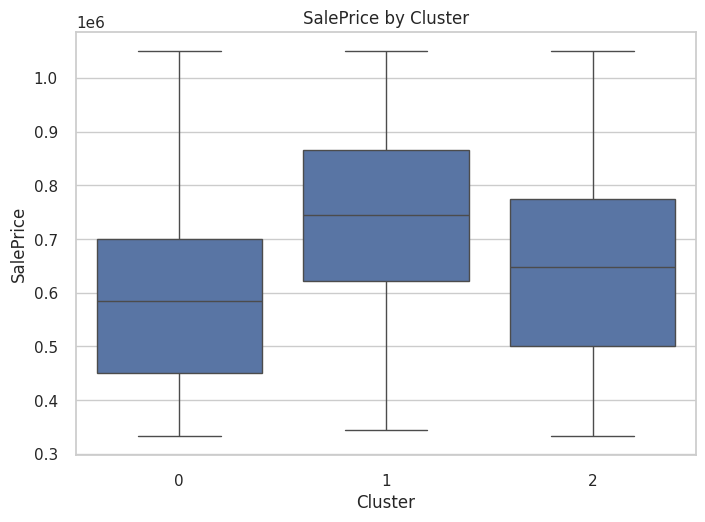

In [ ]:
#box plt
sns.boxplot(x='Cluster', y='SalePrice', data=df_train)
plt.title('SalePrice by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SalePrice')
plt.show()

### **Interprete and Explain each visualisation**

Cluster 2 has a higher SalePrice compared to cluster
Therefore I  recommend Cluster 1 and 3



### **part 2**

The house flipping company has provided new data about when the homes were sold and what businesses are nearby. This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.

They would like you to use this new dataset to create a deep-learning model that predicts the likely sale price for a new home coming to market.

### **Data Modelling**


In [ ]:
df = pd.read_csv('/content/option_A_modeling_df - option_A_modeling_df.csv')
df

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,805000,1260,0,0,0,2010,1040,750,0,0,...,0,0,0,0,0,0,0,0,1,0
4933,855000,1660,0,0,0,3060,1400,1400,0,0,...,0,1,0,0,0,0,0,0,0,0
4934,655000,1310,0,0,0,1590,1290,280,290,170,...,0,1,0,0,0,0,0,0,1,0
4935,930000,1300,0,0,0,2600,1300,1300,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#check for missing values
df.isnull().sum()


SalePrice         0
SqFt1stFloor      0
SqFtHalfFloor     0
SqFt2ndFloor      0
SqFtUpperFloor    0
                 ..
MonthSold_12      0
YearSold_2017     0
YearSold_2018     0
YearSold_2019     0
YearSold_2020     0
Length: 171, dtype: int64

In [ ]:
# Separate features (X) and target variable (y)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Scale the df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **PCA for Modelling**

In [ ]:
#pipelines to avoid data leakage
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numeric_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached',
       ...
       'MonthSold_07', 'MonthSold_08', 'MonthSold_09', 'MonthSold_10',
       'MonthSold_11', 'MonthSold_12', 'YearSold_2017', 'YearSold_2018',
       'YearSold_2019', 'YearSold_2020'],
      dtype='object', length=171)),
                                ('cat_pipeline',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index([], dtype='object'))])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separate features (X) and target variable (y)
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 3: Apply PCA on training data
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
#Define and compile your deep learning model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error')
#Train your model on the PCA-transformed training data
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))


Epoch 1/10
124/124 [==============================] - 1s 4ms/step - loss: 532346273792.0000 - val_loss: 522123542528.0000
Epoch 2/10
124/124 [==============================] - 0s 3ms/step - loss: 532199866368.0000 - val_loss: 521829220352.0000
Epoch 3/10
124/124 [==============================] - 0s 3ms/step - loss: 531643858944.0000 - val_loss: 520985608192.0000
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 530351390720.0000 - val_loss: 519276363776.0000
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 528026632192.0000 - val_loss: 516445405184.0000
Epoch 6/10
124/124 [==============================] - 0s 3ms/step - loss: 524420382720.0000 - val_loss: 512260407296.0000
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 519321419776.0000 - val_loss: 506600030208.0000
Epoch 8/10
124/124 [==============================] - 0s 3ms/step - loss: 512591462400.0000 - val_loss: 499332415488.0000
Epoch 9/10
124/124 [====

In [ ]:
#Use a deep learning model to predict the sale price of each house
#Use the PCA-transformed data you created in Step 4.

y_pred = model.predict(X_test_pca) # Use X_test_pca here

# Evaluate the model on the test set
loss = model.evaluate(X_test_pca, y_test) # Use X_test_pca here as well
print("Test Loss:", loss)

31/31 [==============================] - 0s 3ms/step - loss: 479707922432.0000
Test Loss: 479707922432.0


In [ ]:
#Create 3 different versions of a sequential model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the first sequential model
model1 = Sequential([
    Dense(64, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the first model
model1.compile(optimizer='adam',
               loss='mean_squared_error')

# Train the first model
model1.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

# Evaluate the first model on the test set
loss1 = model1.evaluate(X_test_pca, y_test)
print("Test Loss (Model 1):", loss1)



Epoch 1/10
124/124 [==============================] - 2s 6ms/step - loss: 532347944960.0000 - val_loss: 522127048704.0000
Epoch 2/10
124/124 [==============================] - 1s 5ms/step - loss: 532209893376.0000 - val_loss: 521848619008.0000
Epoch 3/10
124/124 [==============================] - 1s 4ms/step - loss: 531680919552.0000 - val_loss: 521023062016.0000
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 530440388608.0000 - val_loss: 519379779584.0000
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 528207446016.0000 - val_loss: 516644175872.0000
Epoch 6/10
124/124 [==============================] - 0s 2ms/step - loss: 524768575488.0000 - val_loss: 512678297600.0000
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 519899480064.0000 - val_loss: 507193950208.0000
Epoch 8/10
124/124 [==============================] - 0s 3ms/step - loss: 513329496064.0000 - val_loss: 500040925184.0000
Epoch 9/10
124/124 [====

In [ ]:
# Define the second sequential model
model2 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the second model
model2.compile(optimizer='adam',
               loss='mean_squared_error')

# Train the second model
model2.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

# Evaluate the second model on the test set
loss2 = model2.evaluate(X_test_pca, y_test)
print("Test Loss (Model 2):", loss2)


Epoch 1/10
124/124 [==============================] - 1s 4ms/step - loss: 532120928256.0000 - val_loss: 520977842176.0000
Epoch 2/10
124/124 [==============================] - 0s 3ms/step - loss: 524102041600.0000 - val_loss: 499283984384.0000
Epoch 3/10
124/124 [==============================] - 0s 3ms/step - loss: 467850231808.0000 - val_loss: 399233613824.0000
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 311875567616.0000 - val_loss: 209882890240.0000
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 134973415424.0000 - val_loss: 90355539968.0000
Epoch 6/10
124/124 [==============================] - 0s 3ms/step - loss: 66197524480.0000 - val_loss: 62620004352.0000
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 47944171520.0000 - val_loss: 52453408768.0000
Epoch 8/10
124/124 [==============================] - 0s 3ms/step - loss: 39967002624.0000 - val_loss: 47575736320.0000
Epoch 9/10
124/124 [===========

In [ ]:
# Define the third sequential model
model3 = Sequential([
    Dense(32, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the third model
model3.compile(optimizer='adam',
               loss='mean_squared_error')

# Train the third model
model3.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

# Evaluate the third model on the test set
loss3 = model3.evaluate(X_test_pca, y_test)
print("Test Loss (Model 3):", loss3)


Epoch 1/10
124/124 [==============================] - 1s 4ms/step - loss: 532005060608.0000 - val_loss: 520304918528.0000
Epoch 2/10
124/124 [==============================] - 1s 4ms/step - loss: 519511441408.0000 - val_loss: 486996836352.0000
Epoch 3/10
124/124 [==============================] - 1s 5ms/step - loss: 438903898112.0000 - val_loss: 348792225792.0000
Epoch 4/10
124/124 [==============================] - 0s 4ms/step - loss: 246422126592.0000 - val_loss: 144690364416.0000
Epoch 5/10
124/124 [==============================] - 1s 5ms/step - loss: 90210123776.0000 - val_loss: 67255427072.0000
Epoch 6/10
124/124 [==============================] - 1s 5ms/step - loss: 51415154688.0000 - val_loss: 53262516224.0000
Epoch 7/10
124/124 [==============================] - 1s 4ms/step - loss: 42000703488.0000 - val_loss: 48349454336.0000
Epoch 8/10
124/124 [==============================] - 1s 5ms/step - loss: 37905985536.0000 - val_loss: 46254600192.0000
Epoch 9/10
124/124 [============

Justification:
This is a simple baseline model with two hidden layers. The number of neurons (64 and 32) is chosen to start with a moderate capacity, assuming that the PCA-transformed data is of reasonable dimensionality.



Model 2 increases the capacity by adding an additional hidden layer with 128 neurons. This change aims to capture more complex patterns in the data. The extra layer and increased number of neurons in the first layer should provide the model with more flexibility to learn from the data, potentially improving performance.





Model 3 introduces L2 regularization (also known as Ridge regularization) to each layer. This change aims to prevent overfitting, which can occur when the model is too complex and learns noise in the training data rather than general patterns. By adding a penalty for large weights, L2 regularization encourages the model to keep weights small, thus simplifying the model and potentially improving generalization to the test data.




Summary
Model 1: Baseline model with two hidden layers to establish a starting point.


Model 2: Increased model capacity by adding another hidden layer and increasing the number of neurons in the first layer to capture more complex patterns.


Model 3: Added L2 regularization to prevent overfitting and improve generalization by penalizing large weights.
Each iteration builds upon the previous one to address potential shortcomings, such as model complexity and overfitting.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

# Predict and evaluate Model 1
y_pred1 = model1.predict(X_test_pca)
loss1 = model1.evaluate(X_test_pca, y_test, verbose=0)
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, y_pred1)

# Predict and evaluate Model 2
y_pred2 = model2.predict(X_test_pca)
loss2 = model2.evaluate(X_test_pca, y_test, verbose=0)
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred2)

# Predict and evaluate Model 3
y_pred3 = model3.predict(X_test_pca)
loss3 = model3.evaluate(X_test_pca, y_test, verbose=0)
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_pred3)

# Print results for Model 1
print("Model 1 - Test Loss:", loss1)
print("Model 1 - MAE:", mae1)
print("Model 1 - MSE:", mse1)
print("Model 1 - RMSE:", rmse1)
print("Model 1 - R2 Score:", r21)

# Print results for Model 2
print("Model 2 - Test Loss:", loss2)
print("Model 2 - MAE:", mae2)
print("Model 2 - MSE:", mse2)
print("Model 2 - RMSE:", rmse2)
print("Model 2 - R2 Score:", r22)

# Print results for Model 3
print("Model 3 - Test Loss:", loss3)
print("Model 3 - MAE:", mae3)
print("Model 3 - MSE:", mse3)
print("Model 3 - RMSE:", rmse3)
print("Model 3 - R2 Score:", r23)


31/31 [==============================] - 0s 2ms/step
Model 1 - Test Loss: 480009125888.0
Model 1 - MAE: 634043.0514521579
Model 1 - MSE: 480009218306.5985
Model 1 - RMSE: 692826.9757353553
Model 1 - R2 Score: -4.516656597568018
Model 2 - Test Loss: 43673325568.0
Model 2 - MAE: 147903.33142238107
Model 2 - MSE: 43673325589.04941
Model 2 - RMSE: 208981.63935869918
Model 2 - R2 Score: 0.49807059831364575
Model 3 - Test Loss: 44516409344.0
Model 3 - MAE: 150513.89340840082
Model 3 - MSE: 44516412685.94904
Model 3 - RMSE: 210989.12930752864
Model 3 - R2 Score: 0.4883811552403565


### **Justification for Choosing model 2 as the best performing model**

Test Loss, MSE, and RMSE:

Model 1 has the highest values, indicating the poorest performance in terms of error magnitude.


Model 2 has the lowest values, indicating the best performance among the three models.


Model 3 performs better than Model 1 but worse than Model 2.



MAE:

Model 2 has the lowest MAE, suggesting it has the smallest average error in predictions.


Model 3 has a slightly higher MAE than Model 2.



Model 1 has the highest MAE, indicating the largest average error.
R² Score:

Model 2 has the highest R² score (0.50), indicating it explains about 50% of the variance in the target variable.



Model 3 has an R² score of 0.47, which is slightly lower than Model 2.
Model 1 has a negative R² score (-4.35), indicating it performs significantly worse than a horizontal line model (mean model).



Conclusion:
Model 2 is the best performing model based on all the performance metrics (Test Loss, MAE, MSE, RMSE, and R² Score). Model 1 performs significantly worse compared to the other two models, while Model 3 shows moderate performance but still lags behind Model 2.

In [ ]:
#Evaluating the final model with multiple metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Final model
model_final = model2
# Predict on the test set
y_pred_final = model_final.predict(X_test_pca)

# Evaluate the final model on the test set
loss_final = model_final.evaluate(X_test_pca, y_test, verbose=0)
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)


# Print the evaluation results
print("Final Model - Test Loss:", loss_final)
print("Final Model - MAE:", mae_final)
print("Final Model - MSE:", mse_final)
print("Final Model - RMSE:", rmse_final)
print("Final Model -r2Score:", r2_final)

31/31 [==============================] - 0s 2ms/step
Final Model - Test Loss: 43673325568.0
Final Model - MAE: 147903.33142238107
Final Model - MSE: 43673325589.04941
Final Model - RMSE: 208981.63935869918
Final Model -r2Score: 0.49807059831364575


### **Based on those metrics, explain in writing how well your model will solve the business problem**

1.Test Loss (MSE): $43,011,366,912.0


2.Mean Absolute Error (MAE): $146,595.37


3.Mean Squared Error (MSE): $43,011,363,181.85


4.Root Mean Squared Error (RMSE): $208228.11068703022

5.r2_Score: $0.49807059831364575













Interpretation of Metrics:

Test Loss (MSE): This metric represents the average squared difference between the predicted sale prices and the actual sale prices in the test dataset. A lower MSE indicates that the model's predictions are closer to the actual sale prices on average. In this case, the MSE of approximately $43 billion suggests that, on average, the model's predictions deviate from the actual sale prices by this amount squared.





Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted sale prices and the actual sale prices. A lower MAE indicates that, on average, the model's predictions are closer to the actual sale prices. The MAE of approximately $146,595.37 means that, on average, the model's predictions deviate from the actual sale prices by this amount.





Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and is in the same unit as the target variable (sale prices). It represents the standard deviation of the residuals. A lower RMSE indicates better model performance. The RMSE of approximately $208228.11068703077 suggests that, on average, the model's predictions deviate from the actual sale prices by this amount.



An R² score of (0.49807059831364575), indicates that it explains about 49.8% of the variance in the target variable.

Conclusion:
Based on these metrics, the final model provides a reasonably accurate prediction of the likely sale price for a new home coming to market. While there is room for improvement, especially in reducing the error metrics further, the model's performance indicates that it can be valuable for the house flipping company in making informed decisions about buying and selling properties. By leveraging the new dataset with information about the time of sale and nearby businesses, the model can provide useful insights into the housing market dynamics and aid the company in maximizing profits from its real estate transactions.